<a href="https://colab.research.google.com/github/AhmadMugiar/Forecasting_ARIMA_Kurs/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy==1.24.4

In [2]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.0 MB/s eta 0:00:00


#IMPORT LABRARIES

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from pmdarima.arima.utils import ndiffs

In [34]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

#LOAD DATA

In [35]:
series = pd.read_excel('/content/Kurs Transaksi USD   (3) (1).xlsx')
series['Tanggal'] = pd.to_datetime(series['Tanggal'])
series

<ipython-input-35-f8c8c2f1e89a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series['Tanggal'] = pd.to_datetime(series['Tanggal'])


,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,1,1,16670.94,16505.06,2025-03-27
1,2,1,16705.11,16538.89,2025-03-26
2,3,1,16643.81,16478.19,2025-03-25
3,4,1,16583.51,16418.49,2025-03-24
4,5,1,16563.40,16398.60,2025-03-21
...,...,...,...,...,...
530,531,1,15688.05,15531.95,2023-01-06
531,532,1,15693.08,15536.92,2023-01-05
532,533,1,15667.95,15512.05,2023-01-04
533,534,1,15649.86,15494.14,2023-01-03


In [36]:
series['Tanggal'] = pd.to_datetime(series['Tanggal']).dt.normalize()
series = series.sort_index()
series

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,1,1,16670.94,16505.06,2025-03-27
1,2,1,16705.11,16538.89,2025-03-26
2,3,1,16643.81,16478.19,2025-03-25
3,4,1,16583.51,16418.49,2025-03-24
4,5,1,16563.40,16398.60,2025-03-21
...,...,...,...,...,...
530,531,1,15688.05,15531.95,2023-01-06
531,532,1,15693.08,15536.92,2023-01-05
532,533,1,15667.95,15512.05,2023-01-04
533,534,1,15649.86,15494.14,2023-01-03


In [37]:
series.set_index('Tanggal', inplace=True)
series

,NO,Nilai,Kurs Jual,Kurs Beli
Tanggal,,,,
2025-03-27,1,1,16670.94,16505.06
2025-03-26,2,1,16705.11,16538.89
2025-03-25,3,1,16643.81,16478.19
2025-03-24,4,1,16583.51,16418.49
2025-03-21,5,1,16563.40,16398.60
...,...,...,...,...
2023-01-06,531,1,15688.05,15531.95
2023-01-05,532,1,15693.08,15536.92
2023-01-04,533,1,15667.95,15512.05


# EKSPLORASI DATA

In [38]:
print("===== Informasi Data =====")
print(f"Jumlah data: {series.shape[0]} baris, {series.shape[1]} kolom")
print("\n===== Deskripsi Statistik =====")
series.describe()

===== Informasi Data =====
Jumlah data: 535 baris, 4 kolom

===== Deskripsi Statistik =====


,NO,Nilai,Kurs Jual,Kurs Beli
count,535.000000,535.0,535.000000,535.000000
mean,268.000000,1.0,15715.423570,15559.051439
std,154.585467,0.0,483.128429,478.320717
min,1.000000,1.0,14705.160000,14558.840000
25%,134.500000,1.0,15337.810000,15185.190000
50%,268.000000,1.0,15687.050000,15530.950000
75%,401.500000,1.0,16132.260000,15971.740000
max,535.000000,1.0,16705.110000,16538.890000


In [39]:
series.head()

,NO,Nilai,Kurs Jual,Kurs Beli
Tanggal,,,,
2025-03-27,1,1,16670.94,16505.06
2025-03-26,2,1,16705.11,16538.89
2025-03-25,3,1,16643.81,16478.19
2025-03-24,4,1,16583.51,16418.49
2025-03-21,5,1,16563.40,16398.60


In [40]:
series.tail()

,NO,Nilai,Kurs Jual,Kurs Beli
Tanggal,,,,
2023-01-06,531,1,15688.05,15531.95
2023-01-05,532,1,15693.08,15536.92
2023-01-04,533,1,15667.95,15512.05
2023-01-03,534,1,15649.86,15494.14
2023-01-02,535,1,15669.96,15514.04


In [41]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 535 entries, 2025-03-27 to 2023-01-02
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NO         535 non-null    int64  
 1   Nilai      535 non-null    int64  
 2   Kurs Jual  535 non-null    float64
 3   Kurs Beli  535 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 20.9 KB


In [42]:
#cek missing value
series.isnull().sum()

,0
NO,0
Nilai,0
Kurs Jual,0
Kurs Beli,0


#DATA PREPROCESSING

In [43]:
df = series.sort_index()
df

,NO,Nilai,Kurs Jual,Kurs Beli
Tanggal,,,,
2023-01-02,535,1,15669.96,15514.04
2023-01-03,534,1,15649.86,15494.14
2023-01-04,533,1,15667.95,15512.05
2023-01-05,532,1,15693.08,15536.92
2023-01-06,531,1,15688.05,15531.95
...,...,...,...,...
2025-03-21,5,1,16563.40,16398.60
2025-03-24,4,1,16583.51,16418.49
2025-03-25,3,1,16643.81,16478.19


In [44]:
df = df.drop(columns=['NO', 'Nilai','Kurs Beli'])
df

,Kurs Jual
Tanggal,
2023-01-02,15669.96
2023-01-03,15649.86
2023-01-04,15667.95
2023-01-05,15693.08
2023-01-06,15688.05
...,...
2025-03-21,16563.40
2025-03-24,16583.51
2025-03-25,16643.81


In [45]:
#cek outlier
Q1 = df['Kurs Jual'].quantile(0.25)
Q3 = df['Kurs Jual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Kurs Jual'] < lower_bound) | (df['Kurs Jual'] > upper_bound)]
print(f"Jumlah Outlier: {len(outliers)}")

Jumlah Outlier: 0


In [46]:
series = df['Kurs Jual'].copy()

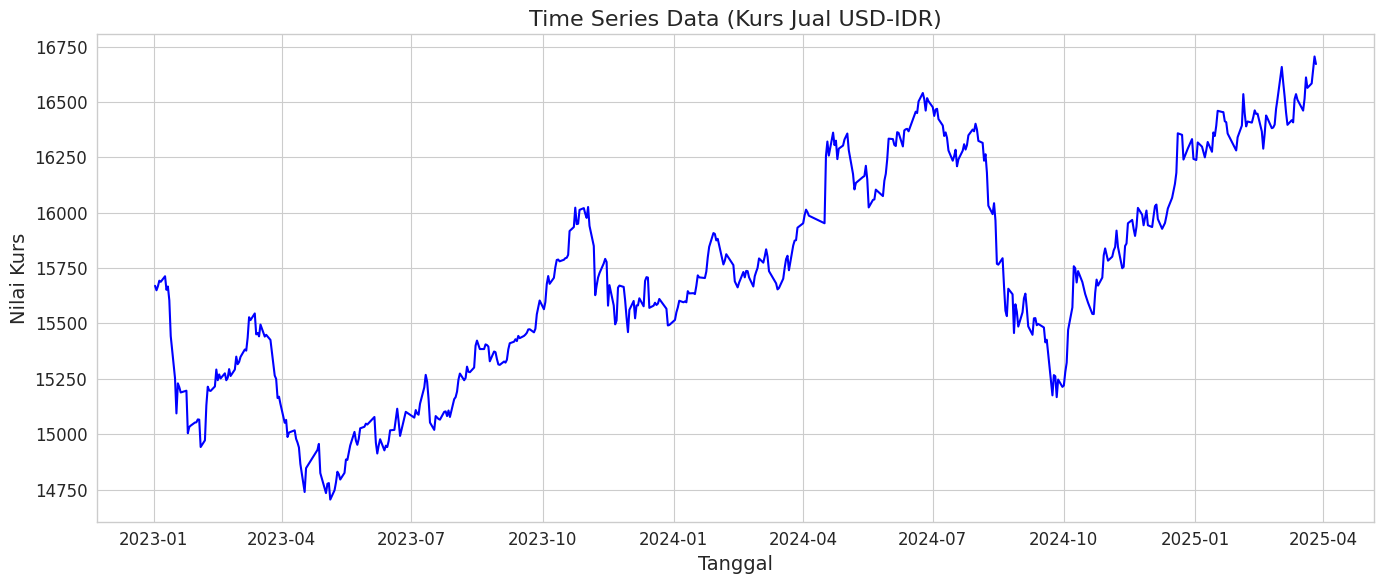

In [47]:
# Plot time series
plt.figure(figsize=(14, 6))
plt.plot(series, color='blue')
plt.title('Time Series Data (Kurs Jual USD-IDR)', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Nilai Kurs', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

#UJI STASIONERITAS DATA

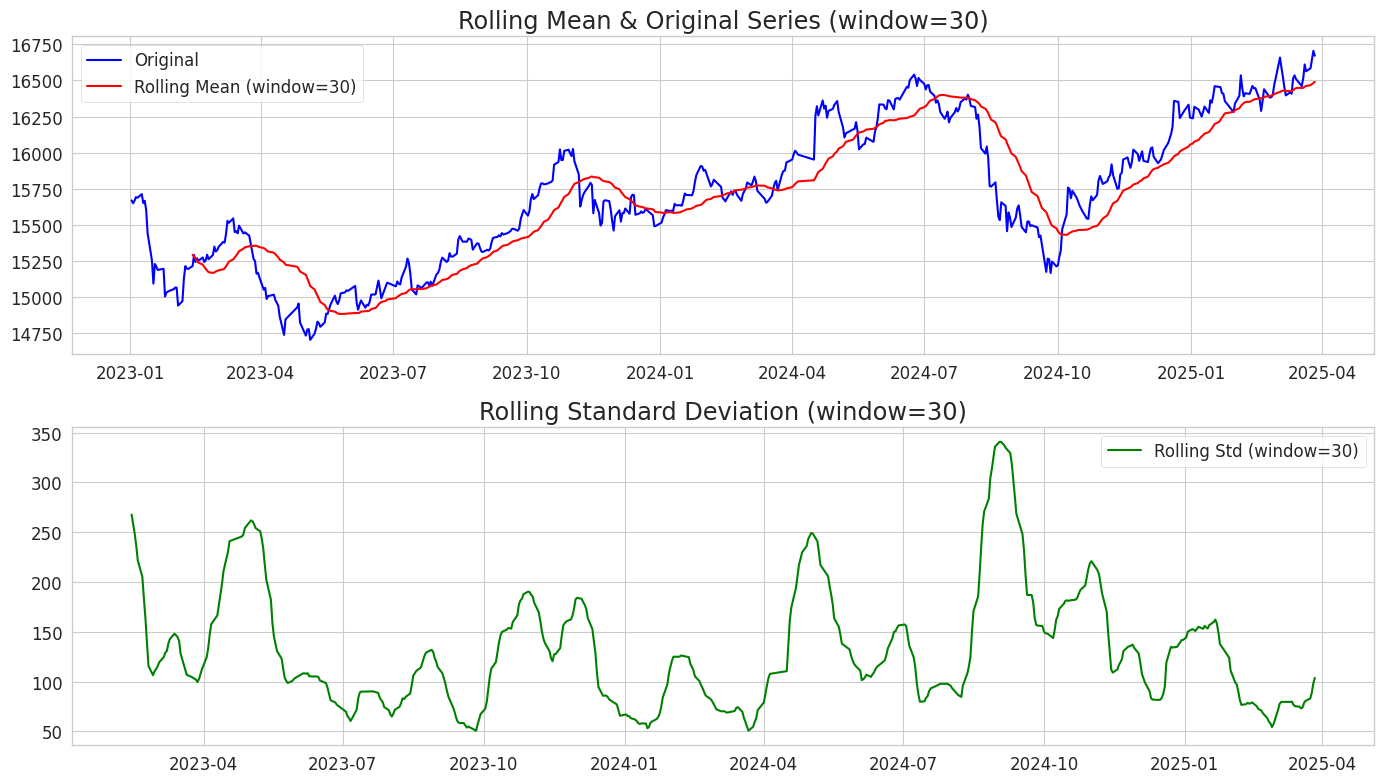

In [48]:
def plot_rolling_statistics(timeseries, window=12):
    """Plot rolling statistics untuk menilai stasioneritas secara visual"""
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    plt.figure(figsize=(14, 8))
    plt.subplot(211)
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label=f'Rolling Mean (window={window})')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Original Series (window={window})')
    plt.tight_layout()

    plt.subplot(212)
    plt.plot(rolling_std, color='green', label=f'Rolling Std (window={window})')
    plt.legend(loc='best')
    plt.title(f'Rolling Standard Deviation (window={window})')
    plt.tight_layout()
    plt.show()

plot_rolling_statistics(series, window=30)

In [49]:
def adf_test(timeseries):
    print('Hasil Uji Augmented Dickey-Fuller (ADF):')
    result = adfuller(timeseries, autolag='AIC')

    output = pd.Series(result[0:4], index=['ADF Statistic', 'p-value', '# Lag Used', '# Observations Used'])
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value

    print(output)

    if result[1] <= 0.05:
        print("Kesimpulan: Data stasioner (Tolak H0)")
    else:
        print("Kesimpulan: Data tidak stasioner (Gagal tolak H0)")

    return result[1] <= 0.05  # True jika stasioner

is_stationary = adf_test(series)

Hasil Uji Augmented Dickey-Fuller (ADF):
ADF Statistic            -1.003229
p-value                   0.752085
# Lag Used               11.000000
# Observations Used     523.000000
Critical Value (1%)      -3.442915
Critical Value (5%)      -2.867082
Critical Value (10%)     -2.569722
dtype: float64
Kesimpulan: Data tidak stasioner (Gagal tolak H0)



Hasil uji ADF setelah differencing pertama:
Hasil Uji Augmented Dickey-Fuller (ADF):
ADF Statistic          -7.662162e+00
p-value                 1.677485e-11
# Lag Used              1.000000e+01
# Observations Used     5.230000e+02
Critical Value (1%)    -3.442915e+00
Critical Value (5%)    -2.867082e+00
Critical Value (10%)   -2.569722e+00
dtype: float64
Kesimpulan: Data stasioner (Tolak H0)


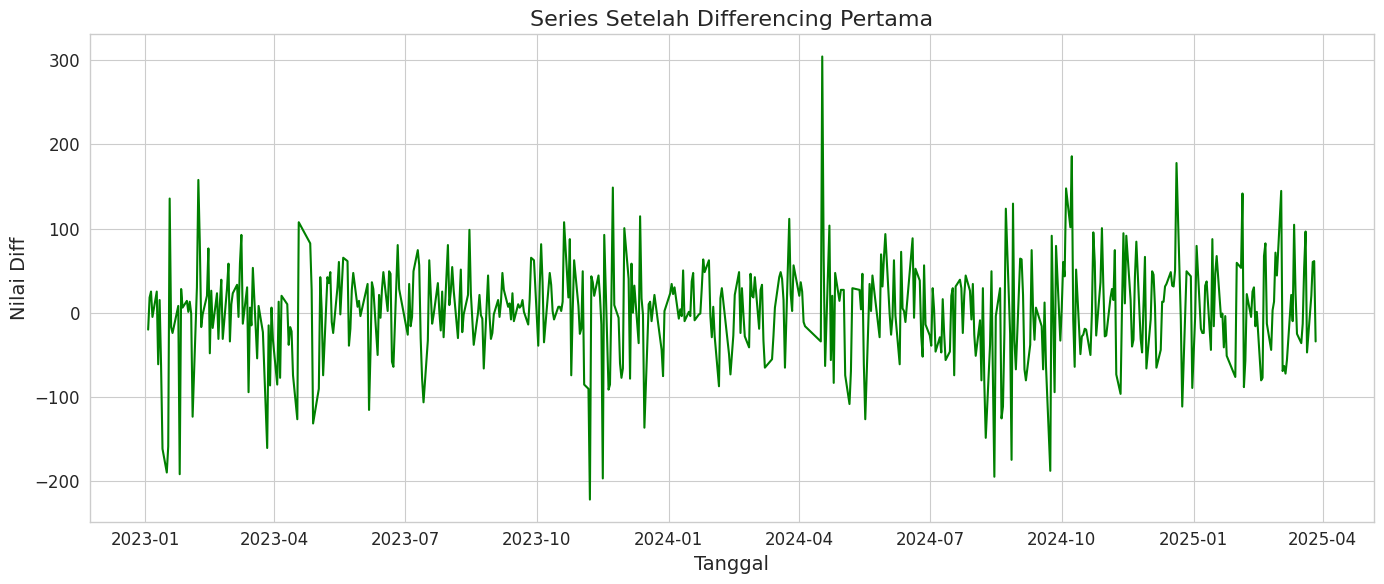

In [50]:
if not is_stationary:
    series_diff1 = series.diff().dropna()
    print("\nHasil uji ADF setelah differencing pertama:")
    is_stationary_diff1 = adf_test(series_diff1)
    plt.figure(figsize=(14, 6))
    plt.plot(series_diff1, color='green')
    plt.title('Series Setelah Differencing Pertama', fontsize=16)
    plt.xlabel('Tanggal', fontsize=14)
    plt.ylabel('Nilai Diff', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Hasil uji ADF setelah transformasi log + differencing:
Hasil Uji Augmented Dickey-Fuller (ADF):
ADF Statistic          -7.685398e+00
p-value                 1.466222e-11
# Lag Used              1.000000e+01
# Observations Used     5.230000e+02
Critical Value (1%)    -3.442915e+00
Critical Value (5%)    -2.867082e+00
Critical Value (10%)   -2.569722e+00
dtype: float64
Kesimpulan: Data stasioner (Tolak H0)


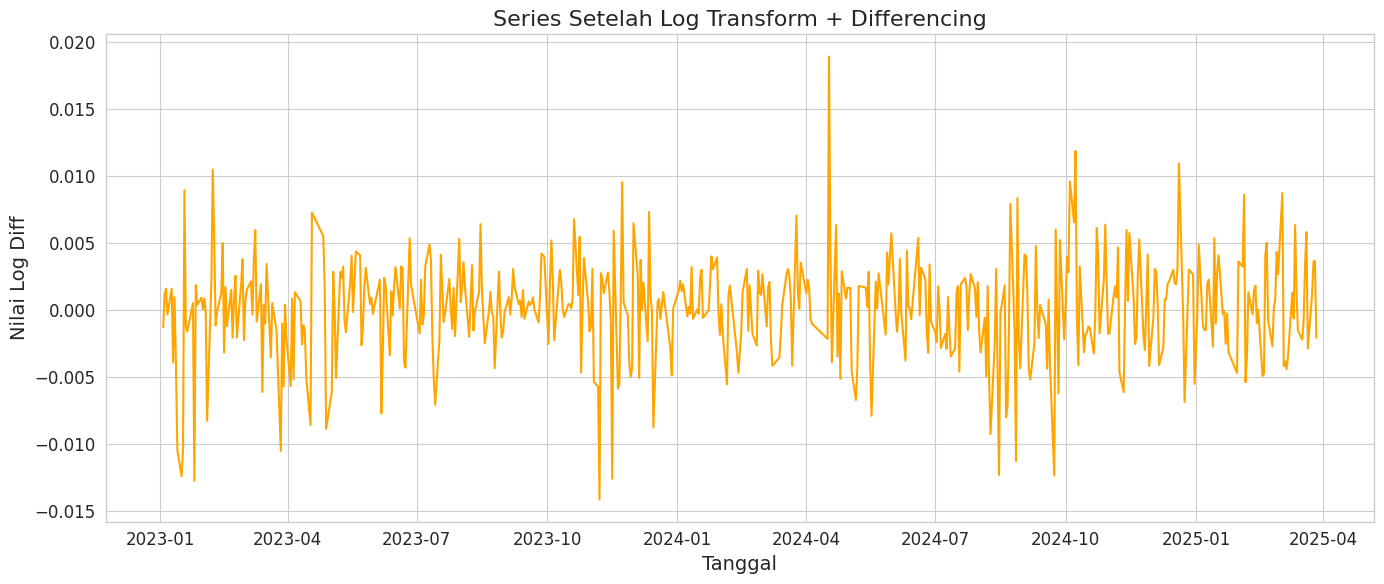

In [51]:
if all(series > 0):  # Memastikan semua nilai positif untuk transformasi log
        series_log = np.log(series)
        series_log_diff = series_log.diff().dropna()
        print("\nHasil uji ADF setelah transformasi log + differencing:")
        is_stationary_log_diff = adf_test(series_log_diff)

        plt.figure(figsize=(14, 6))
        plt.plot(series_log_diff, color='orange')
        plt.title('Series Setelah Log Transform + Differencing', fontsize=16)
        plt.xlabel('Tanggal', fontsize=14)
        plt.ylabel('Nilai Log Diff', fontsize=14)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [52]:
d_value = ndiffs(series, test='adf')
print(f"\nNilai d yang direkomendasikan berdasarkan uji ADF: {d_value}")


Nilai d yang direkomendasikan berdasarkan uji ADF: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [53]:
# Memilih series yang akan digunakan untuk analisis lanjutan
if d_value == 0:
    z = series.copy()
    print("Data sudah stasioner, tidak perlu differencing")
elif d_value == 1:
    z = series.diff().dropna()
    print("Menggunakan data setelah differencing pertama")
else:
    z = series.diff().diff().dropna()
    print("Menggunakan data setelah differencing kedua")

Menggunakan data setelah differencing pertama


#PLOT ACF DAN PACF

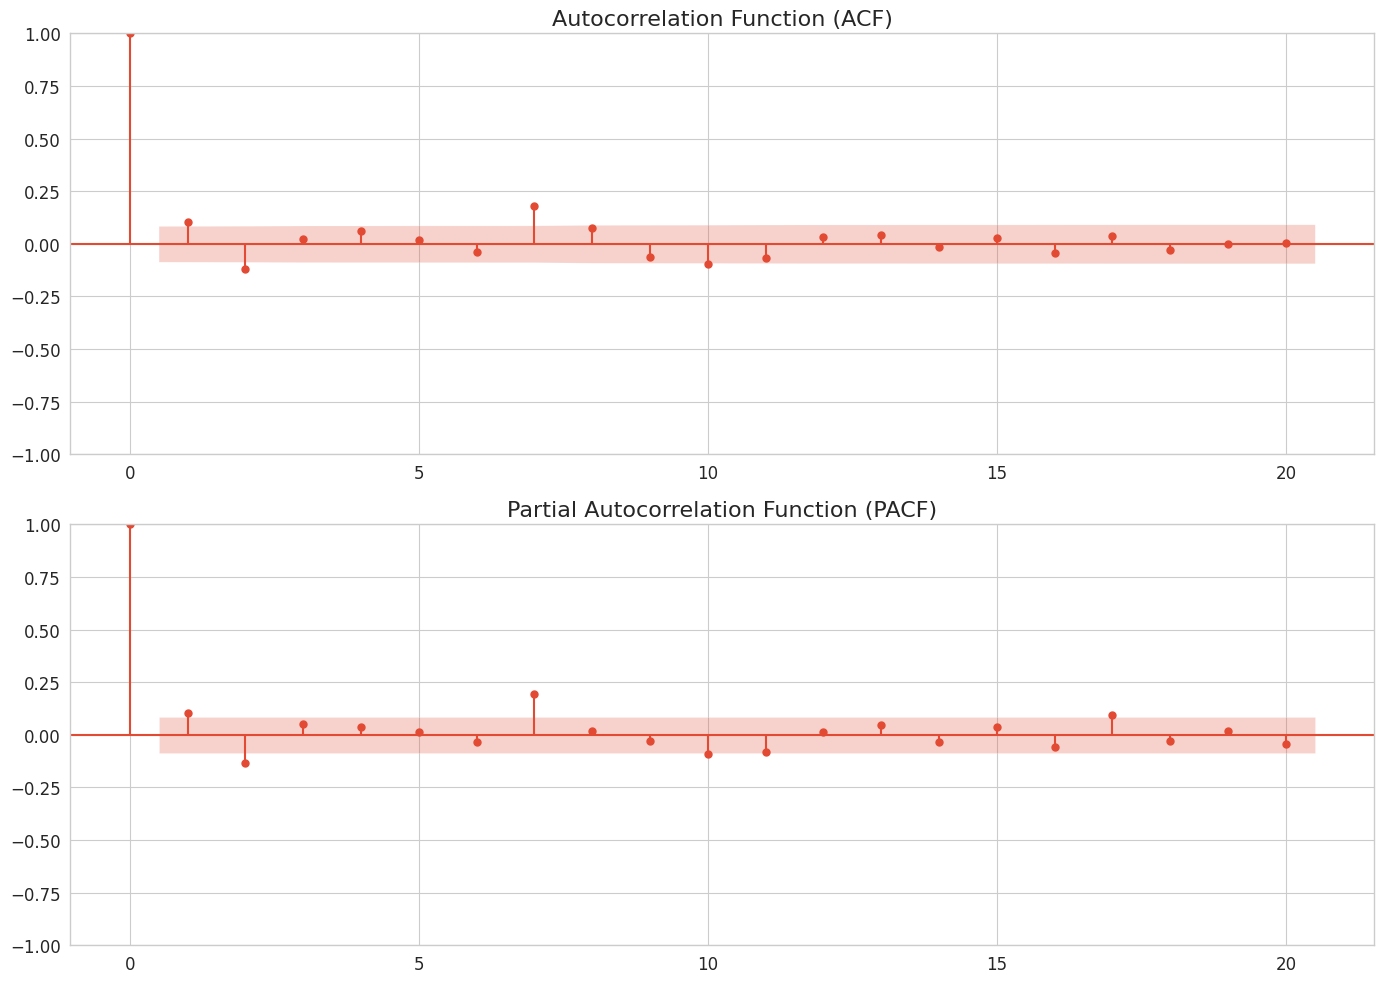

In [54]:
plt.figure(figsize=(14, 10))
# Plot ACF
plt.subplot(211)
plot_acf(z, lags=20, alpha=0.05, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)', fontsize=16)
plt.grid(True)

# Plot PACF
plt.subplot(212)
plot_pacf(z, lags=20, alpha=0.05, method='ols', ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

#GRID SEARCH MANUAL UNTUK PARAMETER ARIMA

In [59]:
# Menghitung ukuran data train (80% dari total data)
train_size = int(len(z) * 0.7)

In [60]:
# Membagi data menjadi train dan test
train_data = z[:train_size]
test_data = z[train_size:]

In [61]:
# Range parameter untuk grid search
p_range = range(0, 2)
q_range = range(0, 2)
d_range = [d_value]  # MA parameter

In [62]:
# Menyimpan nilai AIC dan parameter terbaik
best_aic = np.inf
best_order = None
best_model = None

In [63]:
# Grid Search untuk parameter ARIMA
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                print(f'Mencoba ARIMA({p},{d},{q})...')
                model = sm.tsa.ARIMA(train_data, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic

                print(f'ARIMA({p},{d},{q}) - AIC: {aic}')

                # Update jika AIC lebih kecil
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                print(f"Error fitting ARIMA({p},{d},{q}): {e}")
                continue

print(f'\nModel terbaik berdasarkan AIC: ARIMA{best_order} - AIC: {best_aic}')


Mencoba ARIMA(0,1,0)...
ARIMA(0,1,0) - AIC: 4272.448336174826
Mencoba ARIMA(0,1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0,1,1) - AIC: 4061.0544196552787
Mencoba ARIMA(1,1,0)...
ARIMA(1,1,0) - AIC: 4208.397442977957
Mencoba ARIMA(1,1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,1) - AIC: 4059.4336722214052

Model terbaik berdasarkan AIC: ARIMA(1, 1, 1) - AIC: 4059.4336722214052


In [64]:
model_best = sm.tsa.ARIMA(train_data, order=best_order)
model_best_fit = model_best.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [65]:
print(model_best_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Kurs Jual   No. Observations:                  373
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2026.717
Date:                Sun, 11 May 2025   AIC                           4059.434
Time:                        08:59:32   BIC                           4071.190
Sample:                             0   HQIC                          4064.103
                                - 373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1001      0.044      2.267      0.023       0.014       0.187
ma.L1         -0.9983      0.027    -36.493      0.000      -1.052      -0.945
sigma2      3117.5993    151.871     20.528      0.0

#UJI DIAGNOSTIK MODEL

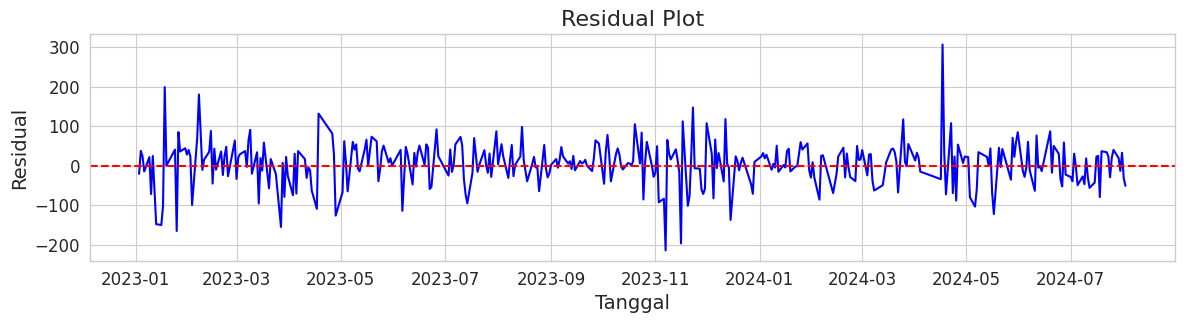

In [66]:
residuals = model_best_fit.resid
plt.figure(figsize=(14, 10))

# Plot residual
plt.subplot(311)
plt.plot(residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.grid(True)

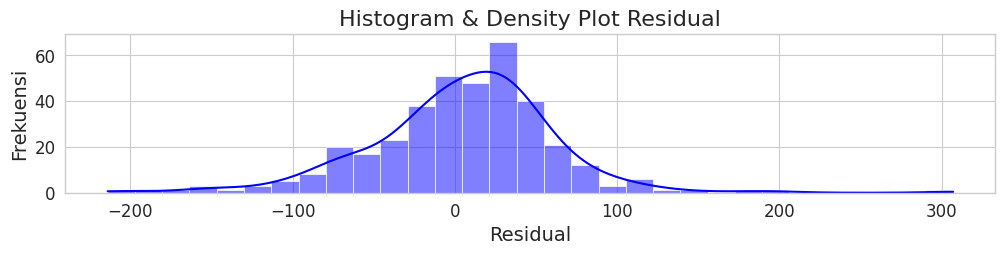

In [67]:
# Histogram residual + density plot
plt.subplot(312)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram & Density Plot Residual', fontsize=16)
plt.xlabel('Residual', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(True)

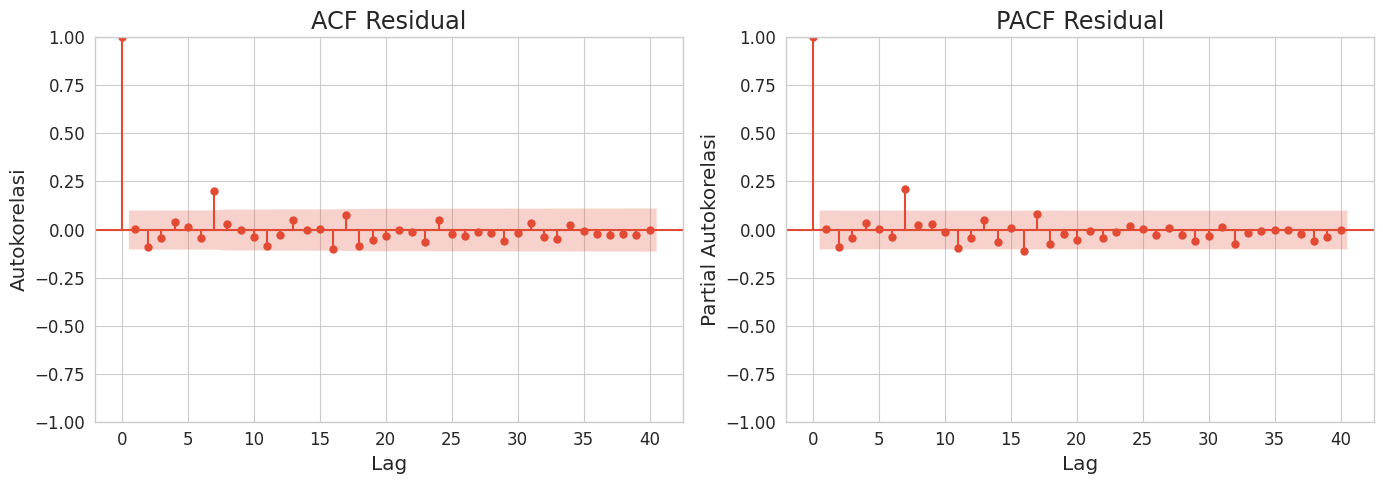


Hasil Uji Ljung-Box:
    lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  0.000139   0.990585  0.000138   0.990623
2  2.965472   0.227016  2.933841   0.230635
3  3.682890   0.297805  3.641693   0.302845
4  4.316982   0.364803  4.265640   0.371247
5  4.375325   0.496736  4.322893   0.503923
6  5.136101   0.526480  5.067439   0.535193


In [72]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Asumsikan Anda sudah memiliki model yang telah di-fit dan variabel 'residuals'
# contoh: residuals = best_model_fit.resid

# Pastikan 'residuals' sudah terdefinisi
if 'residuals' not in locals() and 'residuals' not in globals():
    print("Error: Variabel 'residuals' belum terdefinisi.")
else:
    # Plot ACF dan PACF dari Residual
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    plot_acf(residuals, lags=40, ax=axes[0])
    axes[0].set_title('ACF Residual')
    axes[0].set_xlabel('Lag')
    axes[0].set_ylabel('Autokorelasi')

    plot_pacf(residuals, lags=40, ax=axes[1], method='ywmle')
    axes[1].set_title('PACF Residual')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Partial Autokorelasi')

    plt.tight_layout()
    plt.show()

    # Uji Ljung-Box untuk Autokorelasi
    ljung_box = acorr_ljungbox(residuals, lags=6, return_df=True, boxpierce=True)
    print('\nHasil Uji Ljung-Box:')
    print(ljung_box)

#EVALUASI MODEL PADA DATA TEST

In [73]:
if d_value >= 1:
    model_eval = sm.tsa.ARIMA(series[:train_size], order=(best_order[0], best_order[1], best_order[2]))
    model_eval_fit = model_eval.fit()
    forecast_steps = len(test_data)
    forecast_result = model_eval_fit.get_forecast(steps=forecast_steps)
    forecast_mean = forecast_result.predicted_mean
    forecast_ci = forecast_result.conf_int()
    actual_test = series[train_size:]
else:
    forecast_steps = len(test_data)
    forecast_result = best_model.get_forecast(steps=forecast_steps)
    forecast_mean = forecast_result.predicted_mean
    forecast_ci = forecast_result.conf_int()
    actual_test = test_data

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [74]:
actual_test = actual_test[:len(forecast_mean)]

In [75]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(actual_test, forecast_mean))
rmse_percent = (rmse / actual_test.mean()) * 100
print(f"RMSE (dalam persen): {rmse_percent:.2f}%")


RMSE (dalam persen): 3.38%


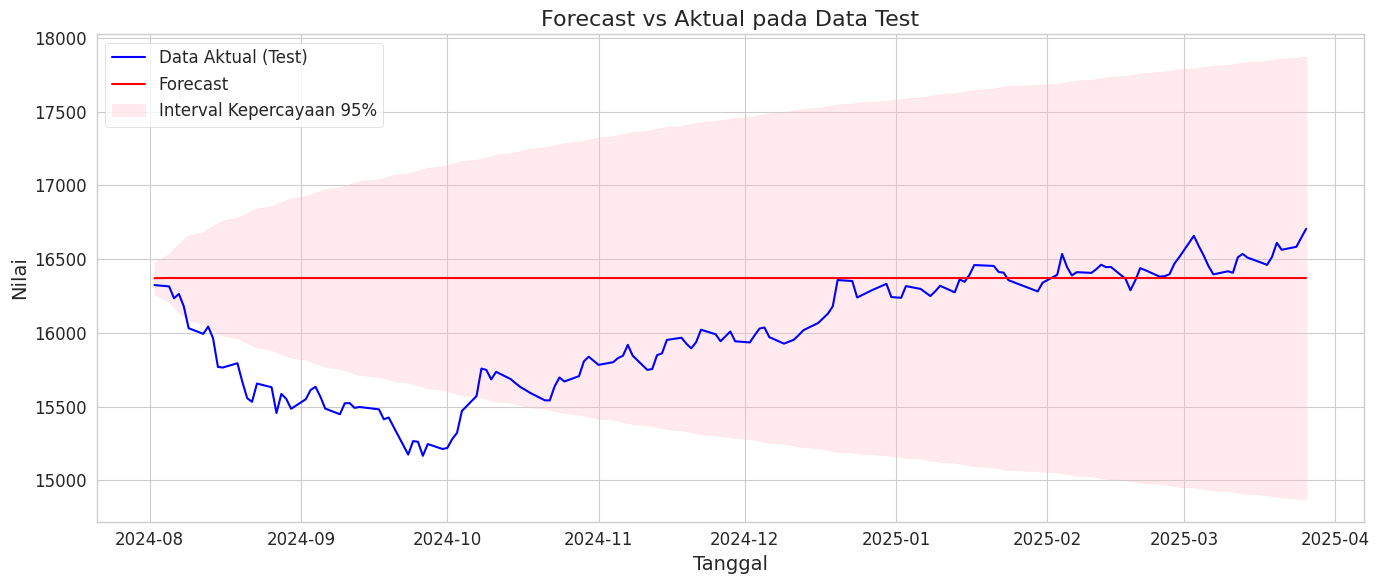

In [76]:
# Visualisasi hasil forecast vs aktual pada data test
plt.figure(figsize=(14, 6))
plt.plot(actual_test.index, actual_test, color='blue', label='Data Aktual (Test)')
plt.plot(actual_test.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(actual_test.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='Interval Kepercayaan 95%')
plt.title('Forecast vs Aktual pada Data Test', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Nilai', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# Menggunakan seluruh data untuk melatih model final
if d_value >= 1:
    # Jika menggunakan differencing, train model pada data asli
    final_model = sm.tsa.ARIMA(series, order=(best_order[0], best_order[1], best_order[2]))
else:
    # Jika tidak ada differencing, gunakan series stasioner
    final_model = sm.tsa.ARIMA(z, order=(best_order[0], best_order[1], best_order[2]))

final_model_fit = final_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [78]:
n_forecast = 30
last_date = series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                               periods=n_forecast,
                               freq='B')
forecast_result = final_model_fit.get_forecast(steps=n_forecast)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


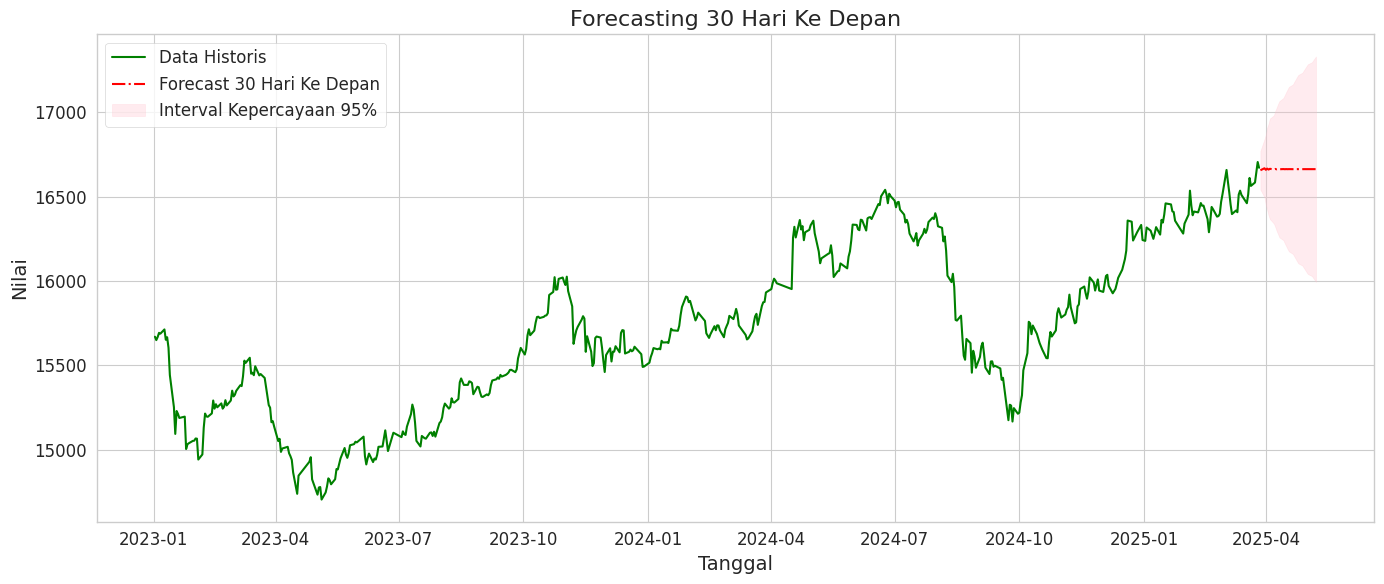

In [79]:
# Visualisasi hasil forecast masa depan
plt.figure(figsize=(14, 6))
plt.plot(series.index, series, label='Data Historis', color='green')
plt.plot(forecast_dates, forecast_mean, label=f'Forecast {n_forecast} Hari Ke Depan',
         color='red', linestyle='-.')
plt.fill_between(forecast_dates,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='Interval Kepercayaan 95%')
plt.title(f'Forecasting {n_forecast} Hari Ke Depan', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Nilai', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
# Simpan hasil forecast ke dataframe
forecast_results_df = pd.DataFrame({
    'Tanggal': forecast_dates,
    'Prediksi': forecast_mean,
    'Lower_CI': forecast_ci.iloc[:, 0],
    'Upper_CI': forecast_ci.iloc[:, 1]
})

print("\n===== Hasil Forecast 30 Hari Ke Depan =====")
print(forecast_results_df)



===== Hasil Forecast 30 Hari Ke Depan =====
       Tanggal      Prediksi      Lower_CI      Upper_CI
535 2025-03-28  16656.296689  16541.765759  16770.827618
536 2025-03-31  16667.827118  16496.188325  16839.465912
537 2025-04-01  16658.747832  16450.821922  16866.673743
538 2025-04-02  16665.897040  16422.974873  16908.819207
539 2025-04-03  16660.267614  16389.714015  16930.821213
540 2025-04-04  16664.700334  16366.988741  16962.411927
541 2025-04-07  16661.209924  16340.148374  16982.271473
542 2025-04-08  16663.958341  16320.008585  17007.908097
543 2025-04-09  16661.794183  16297.222772  17026.365595
544 2025-04-10  16663.498284  16278.787348  17048.209219
545 2025-04-11  16662.156442  16258.777429  17065.535454
546 2025-04-14  16663.213034  16241.639734  17084.786334
547 2025-04-15  16662.381053  16223.633835  17101.128271
548 2025-04-16  16663.036171  16207.559971  17118.512372
549 2025-04-17  16662.520318  16191.062216  17133.978420
550 2025-04-18  16662.926511  16175.893404 